In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.cluster import KMeans 
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer, ENGLISH_STOP_WORDS
from sklearn.decomposition import PCA
from sklearn.preprocessing import normalize
from sklearn.metrics import pairwise_distances

import nltk
import string

doc_topic_matrix = pd.read_pickle("./dtm_2019")
doc_topic = doc_topic_matrix.values

In [38]:
def display_cluster(X,km=[],num_clusters=0):
    alpha = 0.5
    s = 20
    color=["tomato", "orange", "yellow", "yellowgreen", "forestgreen", "skyblue", "royalblue", "darkorchid", "violet", "deeppink"]
    if num_clusters == 0:
        plt.scatter(X[:,0], X[:,1], alpha=alpha, s=s, c=color[6]) 
    else:
        for i in range(num_clusters):
            plt.scatter(X[km.labels_==i,0], X[km.labels_==i,1],alpha=alpha, s=s, c=color[i])
            plt.scatter(km.cluster_centers_[i][0], km.cluster_centers_[i][1], marker='x', s=100, c=color[i])
    plt.title('KMeans Clustering')
    plt.xlabel('Component 1')
    plt.ylabel('Component 2')
    plt.figure(figsize=(12,8));


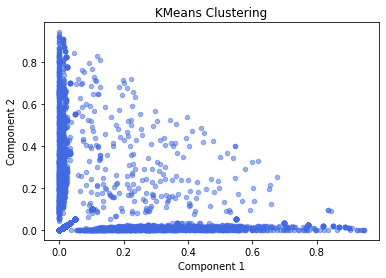

<Figure size 720x576 with 0 Axes>

In [37]:
display_cluster(doc_topic) # no clusters, by default

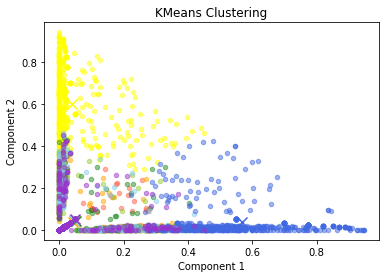

<Figure size 864x576 with 0 Axes>

In [40]:
from sklearn.cluster import KMeans

num_clusters = 10 # my original number of topics 
km = KMeans(n_clusters=num_clusters)
km.fit(doc_topic)
display_cluster(doc_topic, km, num_clusters)

In [19]:
km.inertia_

443.6752919413671

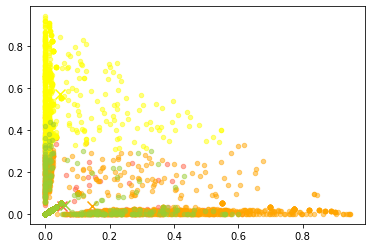

In [20]:
num_clusters = 4 # a randomly chosen smaller number of topics based on the image above
km = KMeans(n_clusters=num_clusters)
km.fit(doc_topic)
display_cluster(doc_topic, km, num_clusters)

In [21]:
km.inertia_

1093.960965902607

### Intertia elbow plot:

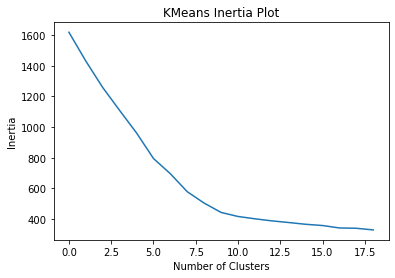

<Figure size 864x576 with 0 Axes>

In [41]:
inertias = []
for i in range(1, 20):
    km = KMeans(n_clusters=i)
    km.fit(doc_topic)
    inertia = km.inertia_
    inertias.append(inertia)

plt.plot(inertias)
plt.title('KMeans Inertia Plot')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.figure(figsize=(12,8));
plt.show()

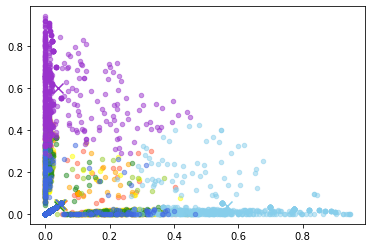

In [23]:
num_clusters = 8
km = KMeans(n_clusters=num_clusters)
km.fit(doc_topic)
display_cluster(doc_topic, km, num_clusters)

In [25]:
km.inertia_

578.51745375365

### PCA and Dimensionality Reduction:

In [28]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
pca.fit(doc_topic)
pcafeatures = pca.transform(doc_topic)

In [29]:
# no target features...is this feasible?

## t-SNE

In [31]:
from sklearn.manifold import TSNE
tsne_model = TSNE(n_components=2, random_state=42)
tsne_data = tsne_model.fit_transform(doc_topic)

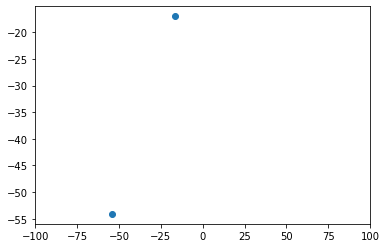

In [35]:
plt.scatter(tsne_data[0], tsne_data[1])
plt.xlim(-100,100);

In [34]:
tsne_data.shape

(4718, 2)